# Mount Google Drive

In [ ]:
# Mount Google Drive untuk akses dataset dan menyimpan model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Menghitung jumlah dataset per-class


Menghitung gambar di setiap subfolder '/content/drive/MyDrive/ProjectCabe/dataset_cabe'...
  Folder 'gemini': 391 gambar.
  Folder 'bercak': 327 gambar.
  Folder 'sehat': 327 gambar.
  Folder 'kriting': 473 gambar.

--- Ringkasan Jumlah Gambar ---
gemini     391
bercak     327
sehat      327
kriting    473
dtype: int64


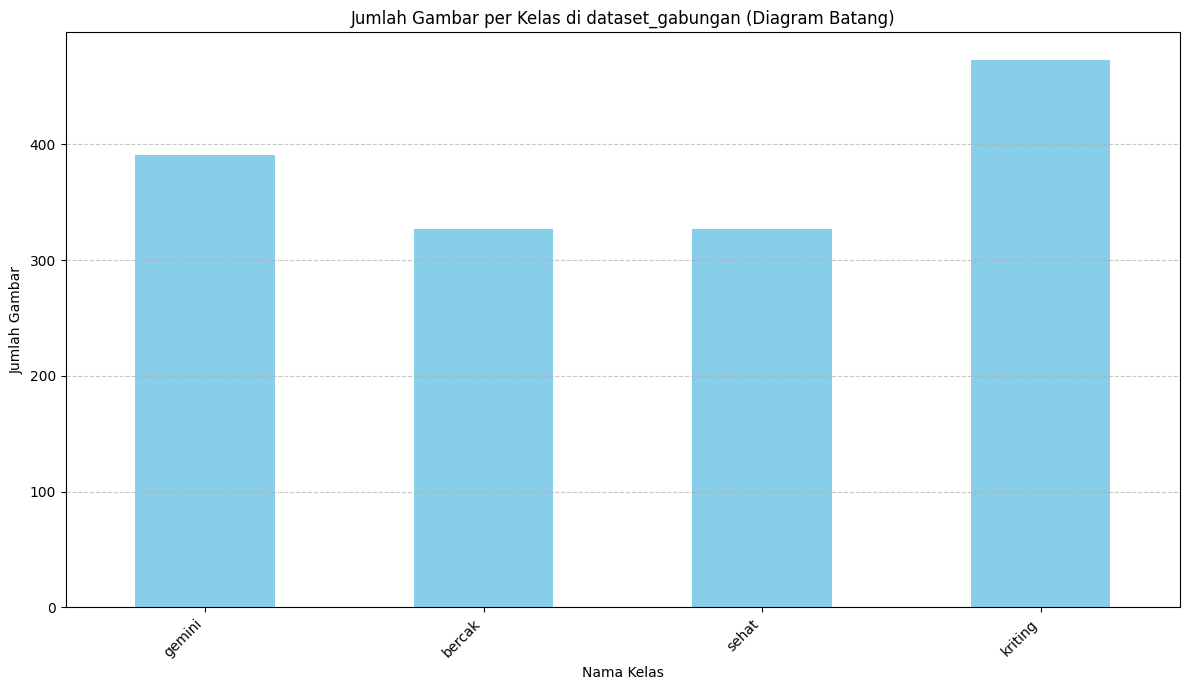

...


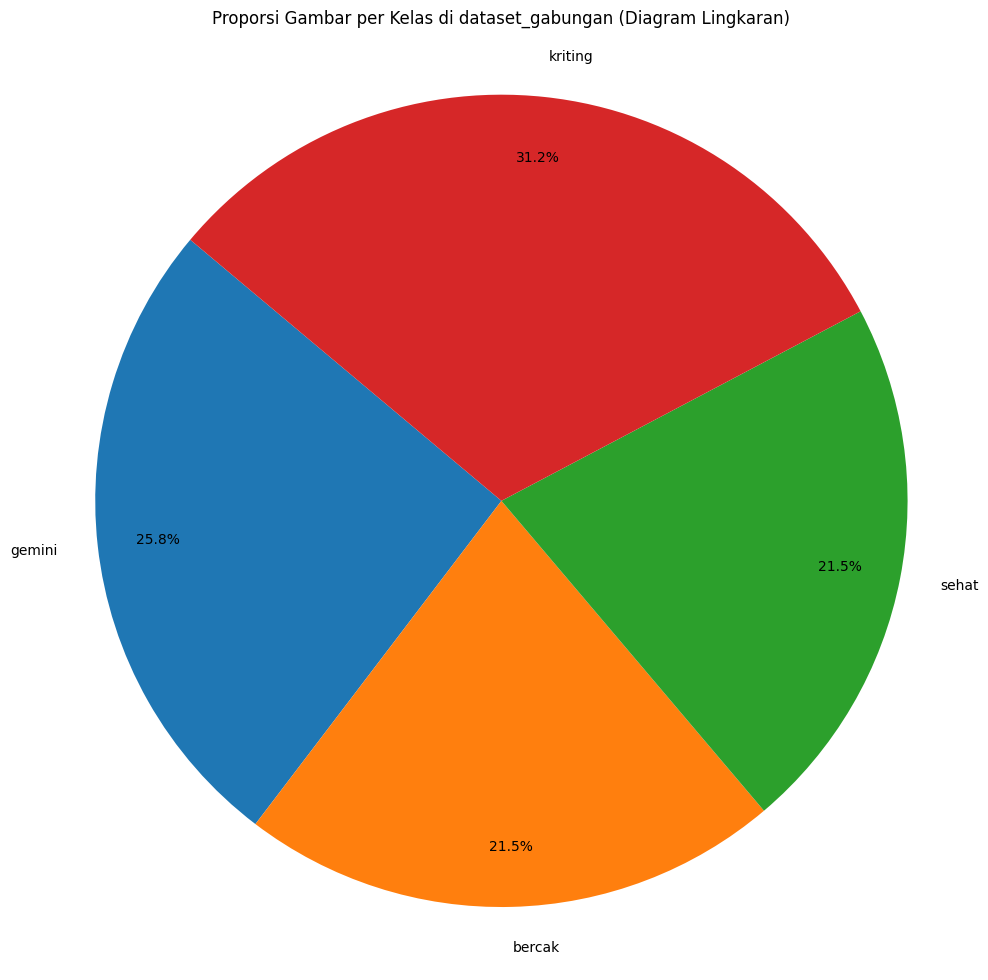


--- TOTAL GAMBAR KESELURUHAN: 1518 ---

Proses analisis dan visualisasi selesai.


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive


# Tentukan path folder gabungan
folder_gabungan = '/content/drive/MyDrive/ProjectCabe/dataset_cabe'

# Kamus untuk menyimpan jumlah gambar per kelas
jumlah_gambar_per_kelas = {}

# Ekstensi file gambar yang umum
ekstensi_gambar = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

print(f"\nMenghitung gambar di setiap subfolder '{folder_gabungan}'...")

# Iterasi setiap subfolder (kelas) di folder_gabungan
if os.path.exists(folder_gabungan):
    for kelas_folder in os.listdir(folder_gabungan):
        path_kelas = os.path.join(folder_gabungan, kelas_folder)

        # Pastikan itu adalah direktori (subfolder kelas)
        if os.path.isdir(path_kelas):
            count = 0
            for file_name in os.listdir(path_kelas):
                if file_name.lower().endswith(ekstensi_gambar):
                    count += 1
            jumlah_gambar_per_kelas[kelas_folder] = count
            print(f"  Folder '{kelas_folder}': {count} gambar.")
else:
    print(f"Folder '{folder_gabungan}' tidak ditemukan. Pastikan path sudah benar.")

# Konversi ke Pandas Series untuk kemudahan visualisasi
data_gambar = pd.Series(jumlah_gambar_per_kelas)

if not data_gambar.empty:
    print("\n--- Ringkasan Jumlah Gambar ---")
    print(data_gambar)

    # --- Diagram Batang ---
    plt.figure(figsize=(12, 7))
    data_gambar.plot(kind='bar', color='skyblue')
    plt.title('Jumlah Gambar per Kelas di dataset_gabungan (Diagram Batang)')
    plt.xlabel('Nama Kelas')
    plt.ylabel('Jumlah Gambar')
    plt.xticks(rotation=45, ha='right') # Rotasi label agar tidak tumpang tindih
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Menyesuaikan layout agar tidak terpotong
    plt.show()
    print("...")

    # --- Diagram Lingkaran ---
    # Filter kelas dengan gambar > 0 untuk diagram lingkaran agar tidak ada slice kosong
    data_gambar_filtered = data_gambar[data_gambar > 0]

    if not data_gambar_filtered.empty:
        plt.figure(figsize=(10, 10))
        plt.pie(data_gambar_filtered, labels=data_gambar_filtered.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
        plt.title('Proporsi Gambar per Kelas di dataset_gabungan (Diagram Lingkaran)')
        plt.axis('equal')  # Memastikan lingkaran sempurna
        plt.tight_layout()
        plt.show()
    else:
        print("\nTidak ada gambar yang ditemukan untuk membuat diagram lingkaran (semua kelas memiliki 0 gambar).")
else:
    print("\nTidak ada data gambar yang ditemukan untuk divisualisasikan.")

# --- Tambahan: Menampilkan jumlah gambar keseluruhan ---
total_gambar_keseluruhan = data_gambar.sum()
print(f"\n--- TOTAL GAMBAR KESELURUHAN: {total_gambar_keseluruhan} ---")

print("\nProses analisis dan visualisasi selesai.")

# Menyiapkan Folder Untuk Split dataset

In [ ]:
import os
import shutil
import random
from tqdm import tqdm # Untuk menampilkan progress bar


# 2. Definisikan path ke dataset asli Anda
# Pastikan path ini sesuai dengan lokasi 'dataset' di Google Drive Anda
# Berdasarkan tangkapan layar Anda, ini seharusnya benar.
original_dataset_path = '/content/drive/MyDrive/ProjectCabe/dataset_cabe'
class_names = ['bercak', 'gemini', 'kriting', 'sehat']

# 3. Definisikan path untuk dataset yang sudah dibagi
split_dataset_path = '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe'

# Rasio pembagian dataset (train, validation, test)
train_ratio = 0.825
val_ratio = 0.125
test_ratio = 0.05

# Pastikan total rasio adalah 1.0
if not (train_ratio + val_ratio + test_ratio == 1.0):
    raise ValueError("Jumlah rasio train, validation, dan test harus 1.0")

print(f"\nMemulai pembagian dataset dari: {original_dataset_path}")
print(f"Dataset yang dibagi akan disimpan di: {split_dataset_path}")
print(f"Rasio: Train={train_ratio*100}%, Validation={val_ratio*100}%, Test={test_ratio*100}%")

# Buat struktur direktori untuk dataset yang dibagi
for subset in ['train', 'valid', 'test']:
    for class_name in class_names:
        os.makedirs(os.path.join(split_dataset_path, subset, class_name), exist_ok=True)
        print(f"Direktori '{os.path.join(split_dataset_path, subset, class_name)}' dibuat atau sudah ada.")

print("\nStruktur direktori berhasil disiapkan.")


Memulai pembagian dataset dari: /content/drive/MyDrive/ProjectCabe/dataset_cabe
Dataset yang dibagi akan disimpan di: /content/drive/MyDrive/ProjectCabe/datasetSplit_cabe
Rasio: Train=82.5%, Validation=12.5%, Test=5.0%
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/train/bercak' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/train/gemini' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/train/kriting' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/train/sehat' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/valid/bercak' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/valid/gemini' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/valid/kriting' dibuat atau sudah ada.
Direktori '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/valid/se

# Split Dataset ke Folder Yang Disiapkan

In [ ]:

print("\nMemulai proses pembagian dan penyalinan file...")

for class_name in class_names:
    class_path = os.path.join(original_dataset_path, class_name)
    all_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    random.shuffle(all_files) # Acak daftar file

    num_files = len(all_files)
    num_train = int(train_ratio * num_files)
    num_val = int(val_ratio * num_files)
    num_test = num_files - num_train - num_val # Sisa untuk test

    train_files = all_files[:num_train]
    val_files = all_files[num_train : num_train + num_val]
    test_files = all_files[num_train + num_val :]

    print(f"\nKelas: {class_name}")
    print(f"Total file: {num_files}")
    print(f"Train files: {len(train_files)}")
    print(f"Validation files: {len(val_files)}")
    print(f"Test files: {len(test_files)}")

    # Salin file ke direktori train
    print(f"Menyalin file {class_name} ke train...")
    for f in tqdm(train_files):
        src = os.path.join(class_path, f)
        dst = os.path.join(split_dataset_path, 'train', class_name, f)
        shutil.copy(src, dst)

    # Salin file ke direktori valid
    print(f"Menyalin file {class_name} ke valid...")
    for f in tqdm(val_files):
        src = os.path.join(class_path, f)
        dst = os.path.join(split_dataset_path, 'valid', class_name, f)
        shutil.copy(src, dst)

    # Salin file ke direktori test
    print(f"Menyalin file {class_name} ke test...")
    for f in tqdm(test_files):
        src = os.path.join(class_path, f)
        dst = os.path.join(split_dataset_path, 'test', class_name, f)
        shutil.copy(src, dst)

print("\nProses pembagian dan penyalinan dataset selesai!")
print(f"Dataset yang sudah dibagi sekarang tersedia di: {split_dataset_path}")


Memulai proses pembagian dan penyalinan file...

Kelas: bercak
Total file: 327
Train files: 269
Validation files: 40
Test files: 18
Menyalin file bercak ke train...


100%|██████████| 269/269 [00:07<00:00, 36.38it/s]


Menyalin file bercak ke valid...


100%|██████████| 40/40 [00:01<00:00, 26.50it/s]


Menyalin file bercak ke test...


100%|██████████| 18/18 [00:00<00:00, 50.79it/s]



Kelas: gemini
Total file: 391
Train files: 322
Validation files: 48
Test files: 21
Menyalin file gemini ke train...


100%|██████████| 322/322 [00:16<00:00, 20.02it/s]


Menyalin file gemini ke valid...


100%|██████████| 48/48 [00:03<00:00, 15.69it/s]


Menyalin file gemini ke test...


100%|██████████| 21/21 [00:00<00:00, 33.84it/s]



Kelas: kriting
Total file: 473
Train files: 390
Validation files: 59
Test files: 24
Menyalin file kriting ke train...


100%|██████████| 390/390 [00:17<00:00, 22.38it/s]


Menyalin file kriting ke valid...


100%|██████████| 59/59 [00:02<00:00, 22.38it/s]


Menyalin file kriting ke test...


100%|██████████| 24/24 [00:00<00:00, 39.58it/s]



Kelas: sehat
Total file: 327
Train files: 269
Validation files: 40
Test files: 18
Menyalin file sehat ke train...


100%|██████████| 269/269 [00:18<00:00, 14.73it/s]


Menyalin file sehat ke valid...


100%|██████████| 40/40 [00:01<00:00, 24.44it/s]


Menyalin file sehat ke test...


100%|██████████| 18/18 [00:01<00:00,  9.97it/s]


Proses pembagian dan penyalinan dataset selesai!
Dataset yang sudah dibagi sekarang tersedia di: /content/drive/MyDrive/ProjectCabe/datasetSplit_cabe


# Data Proccesing & Augmentasi

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
# Path ke dataset di Google Drive Anda
BASE_DIR = '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VALID_DIR = os.path.join(BASE_DIR, 'valid')
TEST_DIR  = os.path.join(BASE_DIR, 'test')

# Ukuran gambar dan batch
IMG_HEIGHT = 224
IMG_WIDTH  = 224
BATCH_SIZE = 32
AUTOTUNE   = tf.data.AUTOTUNE

# Load dataset (mentah)
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

# Ambil nama kelas (AMBIL DI SINI sebelum .map(), supaya tidak hilang)
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Class Names: {class_names}")
print(f"Number of Classes: {num_classes}")

# Data Augmentation (lebih ringan & relevan domain)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),   # vertikal biasanya kurang realistis untuk daun
    tf.keras.layers.RandomRotation(0.05),       # ~±9°
    tf.keras.layers.RandomZoom(0.10),
    # tf.keras.layers.RandomContrast(0.10),     # OPSIONAL: aktifkan jika perlu, jangan 0.2 dulu
])

# Layer rescale hanya untuk kebutuhan augment (banyak layer augment expect 0..1)
rescale01 = tf.keras.layers.Rescaling(1./255)

# --- Fungsi pemetaan ---

# TRAIN: augment di [0,1], lalu balikan ke 0..255 dan panggil preprocess_input (mode caffe ResNet)
def augment_then_preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = rescale01(image)
    image = data_augmentation(image, training=True)
    image = tf.clip_by_value(image * 255.0, 0.0, 255.0)  # kembali ke 0..255 agar cocok preprocess_input ResNet
    image = preprocess_input(image)  # akan konversi sesuai yang diharapkan ResNet (zero-center per channel)
    return image, label

# VALID/TEST: tanpa augment, langsung preprocess_input (asumsikan input 0..255 float32)
def preprocess_only(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)
    return image, label

# --- Susun pipeline ---

# Penting: cache SEBELUM augmentasi agar tiap epoch tetap dapat augmentasi acak (tidak “membekukan” hasil augment)
train_ds = (
    train_ds
    .cache()
    .map(augment_then_preprocess, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

# Untuk valid/test tidak ada augmentasi, jadi boleh map -> cache agar hemat compute di epoch-epoch berikutnya
valid_ds = (
    valid_ds
    .map(preprocess_only, num_parallel_calls=AUTOTUNE)
    .cache()
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(preprocess_only, num_parallel_calls=AUTOTUNE)
    .cache()
    .prefetch(AUTOTUNE)
)

print("\nData preprocessing and augmentation complete (ResNet-friendly).")


Found 1250 files belonging to 4 classes.
Found 187 files belonging to 4 classes.
Found 81 files belonging to 4 classes.
Class Names: ['bercak', 'gemini', 'kriting', 'sehat']
Number of Classes: 4

Data preprocessing and augmentation complete (ResNet-friendly).


# Load Base Model Resnet101



In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def build_resnet101_model(input_shape, num_classes, head_units=256, dropout=0.4, lr_head=1e-3):
    # Input eksplisit → memudahkan kontrol & penamaan
    inputs = tf.keras.Input(shape=input_shape, name="input_image")

    # Base model (pretrained) — dibekukan untuk training head dulu
    base_model = ResNet101(
        include_top=False,
        weights='imagenet',
        input_tensor=inputs,
        pooling=None,                      # kita tambahkan GAP sendiri di bawah
        name='resnet101_backbone'          # beri nama agar mudah direferensikan saat FT
    )
    base_model.trainable = False

    # Head sederhana & stabil
    x = base_model.output
    x = GlobalAveragePooling2D(name='gap')(x)
    x = Dense(head_units, activation='relu', name='head_dense')(x)
    x = Dropout(dropout, name='head_dropout')(x)
    outputs = Dense(num_classes, activation='softmax', name='pred')(x)

    model = Model(inputs=inputs, outputs=outputs, name='resnet101_classifier')

    # Compile untuk tahap "head-only"
    model.compile(
        optimizer=Adam(learning_rate=lr_head),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model, base_model  # ⬅️ penting: kembalikan keduanya

# Pakai IMG_HEIGHT/IMG_WIDTH dari cell sebelumnya
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

# Bangun model
resnet101_model, resnet101_backbone = build_resnet101_model(input_shape, num_classes)
print("\nResNet101 Model Summary:")
resnet101_model.summary()


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

ResNet101 Model Summary:


Model: "resnet101_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_image[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 43,183,748 (164.73 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

# Callbacks Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, BackupAndRestore
import os, datetime, pickle

# ====== Paths ======
CHECKPOINT_DIR = '/content/drive/MyDrive/ProjectCabe/train3'   # sesuaikan
HISTORY_DIR    = os.path.join(CHECKPOINT_DIR, 'history')
LOG_DIR        = os.path.join(CHECKPOINT_DIR, 'logs')
BACKUP_DIR     = os.path.join(CHECKPOINT_DIR, 'backup')

os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(HISTORY_DIR, exist_ok=True)
os.makedirs(LOG_DIR, exist_ok=True)
os.makedirs(BACKUP_DIR, exist_ok=True)

print(f"Direktori checkpoint: {CHECKPOINT_DIR}")
print(f"Direktori history:   {HISTORY_DIR}")
print(f"Direktori logs:      {LOG_DIR}")

# ====== Helper: simpan history ======
def save_history(history_object, model_name, history_dir=HISTORY_DIR):
    filename = os.path.join(history_dir, f'{model_name}_history.pkl')
    with open(filename, 'wb') as f:
        pickle.dump(history_object.history, f)
    print(f"History untuk {model_name} disimpan di: {filename}")

# Gunakan metric validasi yang dimaksimalkan
MONITOR_METRIC = 'val_accuracy'  # ganti ke 'val_sparse_categorical_accuracy' jika diperlukan

# Timestamp untuk penamaan unik (dipakai oleh KEDUA fase)
stamp = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

# === SATU checkpoint untuk head & fine-tuning ===
ckpt_best = ModelCheckpoint(
    filepath=os.path.join(CHECKPOINT_DIR, f'resnet101_best_{stamp}.keras'),
    monitor=MONITOR_METRIC,
    save_best_only=True,
    mode='max',              # karena ingin memaksimalkan akurasi
    verbose=1
)

# CSV satu file, di-append dari kedua fase
csv_all = CSVLogger(os.path.join(LOG_DIR, f'resnet101_train_{stamp}.csv'), append=True)

backup = BackupAndRestore(backup_dir=BACKUP_DIR)

# =========================================================
# Callbacks TAHAP 1: Training head (base dibekukan)
# =========================================================
es_head = EarlyStopping(
    monitor=MONITOR_METRIC,
    patience=5,
    min_delta=1e-4,          # kenaikan akurasi minimum yang dianggap perbaikan
    mode='max',
    restore_best_weights=True,
    verbose=1
)
rlr_head = ReduceLROnPlateau(
    monitor=MONITOR_METRIC,
    factor=0.5,
    patience=5,
    mode='max',
    min_lr=1e-7,
    verbose=1
)
callbacks_resnet101_head = [ckpt_best, es_head, rlr_head, csv_all, backup]
print("Callbacks tahap 1 (head-only) siap (monitor val_accuracy).")

# =========================================================
# Callbacks TAHAP 2: Fine-tuning (unfreeze sebagian)
# =========================================================
es_ft = EarlyStopping(
    monitor=MONITOR_METRIC,
    patience=20,
    min_delta=1e-4,
    mode='max',
    restore_best_weights=True,
    verbose=1
)
rlr_ft = ReduceLROnPlateau(
    monitor=MONITOR_METRIC,
    factor=0.5,
    patience=5,              # respons LR lebih cepat saat FT
    mode='max',
    min_lr=1e-7,
    verbose=1
)
callbacks_resnet101_ft = [ckpt_best, es_ft, rlr_ft, csv_all, backup]
print("Callbacks tahap 2 (fine-tuning) siap (monitor val_accuracy).")

print("\nSemua set callbacks model sudah siap.")
print(f"📌 Model terbaik (berdasarkan {MONITOR_METRIC}) akan tersimpan di: {os.path.join(CHECKPOINT_DIR, f'resnet101_best_{stamp}.keras')}")
print(f"📄 Log gabungan (head+FT): {os.path.join(LOG_DIR, f'resnet101_train_{stamp}.csv')}")


Direktori checkpoint: /content/drive/MyDrive/ProjectCabe/train3
Direktori history:   /content/drive/MyDrive/ProjectCabe/train3/history
Direktori logs:      /content/drive/MyDrive/ProjectCabe/train3/logs
Callbacks tahap 1 (head-only) siap (monitor val_accuracy).
Callbacks tahap 2 (fine-tuning) siap (monitor val_accuracy).

Semua set callbacks model sudah siap.
📌 Model terbaik (berdasarkan val_accuracy) akan tersimpan di: /content/drive/MyDrive/ProjectCabe/train3/resnet101_best_20250916-055230.keras
📄 Log gabungan (head+FT): /content/drive/MyDrive/ProjectCabe/train3/logs/resnet101_train_20250916-055230.csv


# Training Restnet101

## Proses Training

In [ ]:
print("\n--- Training ResNet101 (HEAD only) ---")
EPOCHS_HEAD = 5  # boleh 8–12

with tf.device('/GPU:0'):
    history_resnet101_head = resnet101_model.fit(
        train_ds,
        epochs=EPOCHS_HEAD,
        validation_data=valid_ds,
        callbacks=callbacks_resnet101_head
        # , class_weight=class_weight  # <-- aktifkan jika kamu sudah menghitung class_weight
    )
save_history(history_resnet101_head, 'resnet101_head')

print("\n--- Fine-tuning ResNet101 (unfreeze partial) ---")

# Pastikan kita pegang backbone yang benar
try:
    resnet101_backbone
except NameError:
    # Ambil dari nama yang kita set waktu build model
    resnet101_backbone = resnet101_model.get_layer('resnet101_backbone')

# === Unfreeze sebagian ekor backbone & BEKUKAN BatchNorm ===
UNFREEZE_TAIL = 40  # coba 30–60 sesuai stabilitas

resnet101_backbone.trainable = True

# Bekukan semua kecuali UNFREEZE_TAIL terakhir
for layer in resnet101_backbone.layers[:-UNFREEZE_TAIL]:
    layer.trainable = False

# Bekukan semua BatchNorm agar statistik tidak drift saat batch kecil
for layer in resnet101_backbone.layers:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False

# Re-compile dengan LR lebih kecil untuk FT
resnet101_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS_FT = 35  # 15–25 lazim untuk FT

# Trik penting: lanjutkan penomoran epoch di CSV/log & grafik
TOTAL_EPOCHS = EPOCHS_HEAD + EPOCHS_FT

with tf.device('/GPU:0'):
    history_resnet101_finetune = resnet101_model.fit(
        train_ds,
        initial_epoch=EPOCHS_HEAD,     # <-- lanjut dari epoch sebelumnya
        epochs=TOTAL_EPOCHS,           # <-- total epoch gabungan
        validation_data=valid_ds,
        callbacks=callbacks_resnet101_ft
        # , class_weight=class_weight   # <-- opsional jika ada ketimpangan kelas
    )
save_history(history_resnet101_finetune, 'resnet101_finetune')

print("\n✅ Training selesai. Checkpoint terbaik (gabungan head+FT) tersimpan sebagai satu file:")
print(os.path.join(CHECKPOINT_DIR, [f for f in os.listdir(CHECKPOINT_DIR) if f.startswith('resnet101_best_') and f.endswith('.keras')][-1]))



--- Training ResNet101 (HEAD only) ---
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5931 - loss: 1.2500
Epoch 1: val_accuracy improved from -inf to 0.86096, saving model to /content/drive/MyDrive/ProjectCabe/train3/resnet101_best_20250916-055230.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.5971 - loss: 1.2366 - val_accuracy: 0.8610 - val_loss: 0.4251 - learning_rate: 0.0010
Epoch 2/5
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8894 - loss: 0.3175
Epoch 2: val_accuracy improved from 0.86096 to 0.88770, saving model to /content/drive/MyDrive/ProjectCabe/train3/resnet101_best_20250916-055230.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.8895 - loss: 0.3165 - val_accuracy: 0.8877 - val_loss: 0.2772 - learning_rate: 0.0010
Epoch 3/5
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9238 - loss: 0.2136
Epoch 3: val_accuracy did not improve from 0.88770
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9241 - loss: 0.2130 - va

## Grafik training/validation loss dan accuracy


--- Menampilkan History ResNet101 (Head Training) ---
History untuk resnet101_head dimuat dari: /content/drive/MyDrive/ProjectCabe/train3/history/resnet101_head_history.pkl
Gambar disimpan ke: /content/drive/MyDrive/ProjectCabe/train3/figures/resnet101_(head_training).png


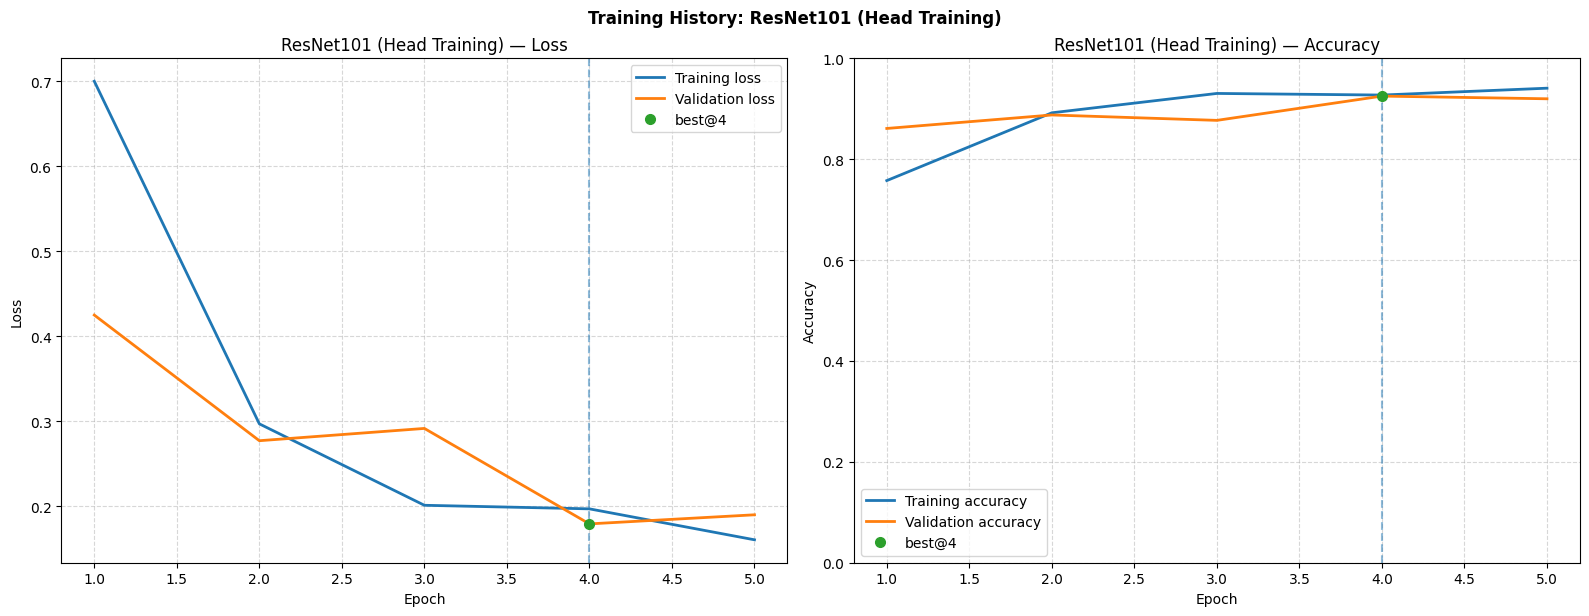


--- Menampilkan History ResNet101 (Fine-tuning) ---
History untuk resnet101_finetune dimuat dari: /content/drive/MyDrive/ProjectCabe/train3/history/resnet101_finetune_history.pkl
Gambar disimpan ke: /content/drive/MyDrive/ProjectCabe/train3/figures/resnet101_(fine-tuning).png


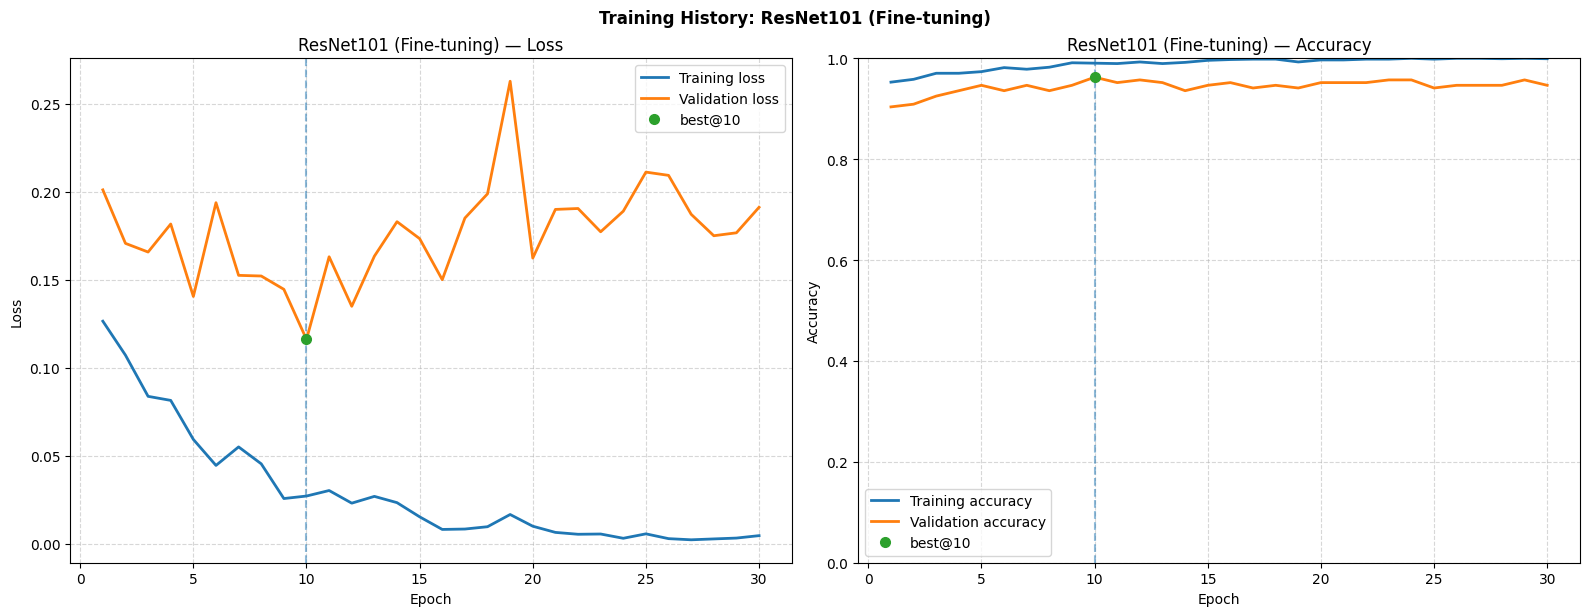

In [ ]:
import matplotlib.pyplot as plt
import pickle, os
import numpy as np

# Direktori tempat file history disimpan (samakan dengan cell callbacks/training)
HISTORY_DIR = '/content/drive/MyDrive/ProjectCabe/train3/history'
FIG_DIR     = '/content/drive/MyDrive/ProjectCabe/train3/figures'
os.makedirs(FIG_DIR, exist_ok=True)

# ---- Loader ----
def load_history(model_name, history_dir=HISTORY_DIR):
    filename = os.path.join(history_dir, f'{model_name}_history.pkl')
    if os.path.exists(filename):
        with open(filename, 'rb') as f:
            history_data = pickle.load(f)
        print(f"History untuk {model_name} dimuat dari: {filename}")
        return history_data
    else:
        print(f"Error: File history untuk {model_name} tidak ditemukan di: {filename}")
        return None

# ---- Util: ambil metric dengan fallback ----
def _get_metric(hist, key, alt_key=None):
    if key in hist:
        return hist[key]
    if alt_key and alt_key in hist:
        return hist[alt_key]
    return None

# ---- Plotter ----
def plot_training_history(history, model_name, save_png=True):
    if history is None:
        print(f"Tidak ada history untuk di-plot: {model_name}")
        return

    # Ambil metric dengan fallback
    loss      = _get_metric(history, 'loss')
    val_loss  = _get_metric(history, 'val_loss')
    acc       = _get_metric(history, 'accuracy', 'acc')
    val_acc   = _get_metric(history, 'val_accuracy', 'val_acc')

    # Validasi ketersediaan
    if loss is None or val_loss is None:
        print("History tidak memuat 'loss/val_loss'.")
        return
    if acc is None or val_acc is None:
        print("History tidak memuat 'accuracy/val_accuracy'.")
        return

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(16, 6))

    # ---- Plot Loss ----
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training loss', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation loss', linewidth=2)

    # Best val_loss
    best_epoch_loss = int(np.argmin(val_loss)) + 1
    best_val_loss   = val_loss[best_epoch_loss - 1]
    plt.axvline(best_epoch_loss, linestyle='--', alpha=0.5)
    plt.plot(best_epoch_loss, best_val_loss, 'o', markersize=7, label=f'best@{best_epoch_loss}')
    plt.title(f'{model_name} — Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

    # ---- Plot Accuracy ----
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label='Training accuracy', linewidth=2)
    plt.plot(epochs, val_acc, label='Validation accuracy', linewidth=2)

    # Best val_acc
    best_epoch_acc = int(np.argmax(val_acc)) + 1
    best_val_acc   = val_acc[best_epoch_acc - 1]
    plt.axvline(best_epoch_acc, linestyle='--', alpha=0.5)
    plt.plot(best_epoch_acc, best_val_acc, 'o', markersize=7, label=f'best@{best_epoch_acc}')
    plt.title(f'{model_name} — Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # akurasi 0..1
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.suptitle(f'Training History: {model_name}', y=1.02, fontweight='bold')

    if save_png:
        safe_name = model_name.lower().replace(' ', '_').replace('/', '_')
        out_path = os.path.join(FIG_DIR, f'{safe_name}.png')
        plt.savefig(out_path, bbox_inches='tight', dpi=160)
        print(f"Gambar disimpan ke: {out_path}")

    plt.show()

# --- PANGGIL ---

print("\n--- Menampilkan History ResNet101 (Head Training) ---")
loaded_history_resnet101_head = load_history('resnet101_head')       # ⬅️ perbaiki nama
plot_training_history(loaded_history_resnet101_head, 'ResNet101 (Head Training)')

print("\n--- Menampilkan History ResNet101 (Fine-tuning) ---")
loaded_history_resnet101_finetune = load_history('resnet101_finetune')  # ⬅️ perbaiki nama
plot_training_history(loaded_history_resnet101_finetune, 'ResNet101 (Fine-tuning)')


# tesk akurasi


Found 81 files belonging to 4 classes.
Kelas (urut folder): ['bercak', 'gemini', 'kriting', 'sehat']
Memuat model terbaik: /content/drive/MyDrive/ProjectCabe/train3/resnet101_best_20250916-055230.keras

--- Prediksi pada TEST set ---
Distribusi prediksi: {'bercak': 20, 'gemini': 22, 'kriting': 22, 'sehat': 17}

                                 Metrics Evaluasi Model (ResNet101)              

Overall Accuracy: 0.9383

Classification Report (Precision, Recall, F1-Score) per class:
------------------------------------------------------------
              precision    recall  f1-score   support

      bercak     0.8500    0.9444    0.8947        18
      gemini     0.9545    1.0000    0.9767        21
     kriting     1.0000    0.9167    0.9565        24
       sehat     0.9412    0.8889    0.9143        18

    accuracy                         0.9383        81
   macro avg     0.9364    0.9375    0.9356        81
weighted avg     0.9418    0.9383    0.9386        81



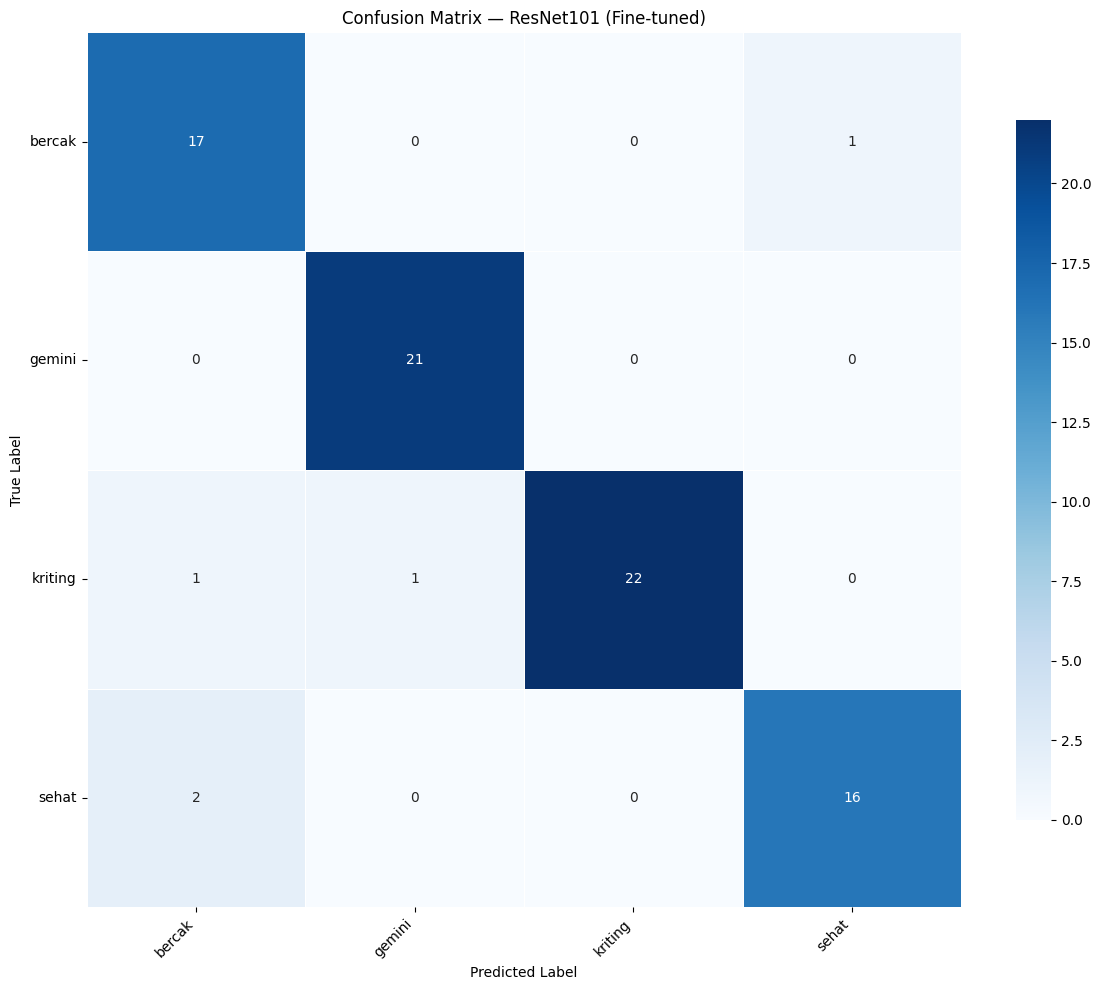

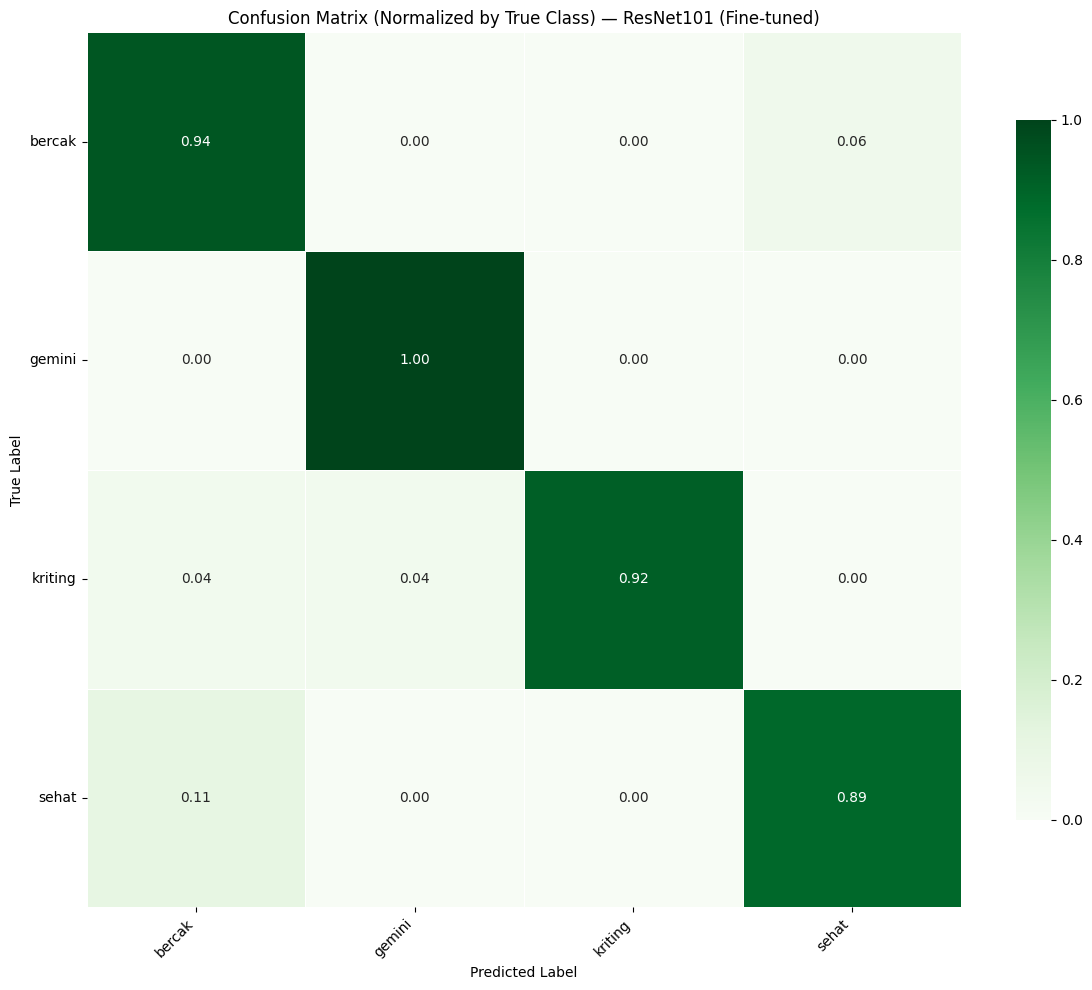


Akurasi per kelas:
bercak         : 0.944
gemini         : 1.000
kriting        : 0.917
sehat          : 0.889


In [ ]:
# =========================
# ALL-IN-ONE EVALUATION — ResNet101 (preprocess_input)
# =========================
import os, glob, numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ---------- PATHS ----------
BASE_DIR  = '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe'
TEST_DIR  = os.path.join(BASE_DIR, 'test')

CHECKPOINT_DIR = '/content/drive/MyDrive/ProjectCabe/train3'
# (Opsional) isi manual; kalau None akan auto-pick file 'resnet101_best_*.keras' terbaru
RESNET101_MODEL_PATH = None
# contoh manual:
# RESNET101_MODEL_PATH = '/content/drive/MyDrive/ProjectCabe/train2/resnet101_best_20250916-033754.keras'

IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
AUTOTUNE   = tf.data.AUTOTUNE

# ---------- DATASET TEST ----------
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)
ds_class_names = test_ds.class_names
num_classes    = len(ds_class_names)
print("Kelas (urut folder):", ds_class_names)

# ---------- PREPROCESS (COCOK ResNet) ----------
from tensorflow.keras.applications.resnet import preprocess_input as preprocess_resnet

def preprocess_data_test(image, label):
    image = tf.cast(image, tf.float32)   # 0..255 float
    image = preprocess_resnet(image)     # ⬅️ penting: sama dengan training
    return image, label

test_ds = test_ds.map(preprocess_data_test, num_parallel_calls=AUTOTUNE).cache().prefetch(AUTOTUNE)

# Ambil y_true dari dataset test
y_true = []
for _, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.asarray(y_true, dtype=int)

# ---------- LOAD MODEL ----------
if RESNET101_MODEL_PATH and os.path.exists(RESNET101_MODEL_PATH):
    best_path = RESNET101_MODEL_PATH
else:
    cands = sorted(glob.glob(os.path.join(CHECKPOINT_DIR, 'resnet101_best_*.keras')), key=os.path.getmtime)
    if not cands:
        raise FileNotFoundError("Tidak menemukan file 'resnet101_best_*.keras' di folder train2. Pastikan training sudah berjalan dan checkpoint tersimpan.")
    best_path = cands[-1]

print(f"Memuat model terbaik: {best_path}")
model = tf.keras.models.load_model(best_path)

# Sanity check jumlah unit output vs jumlah kelas
out_units = model.output_shape[-1]
assert out_units == num_classes, f"Output model ({out_units}) ≠ jumlah kelas dataset ({num_classes}). Cek ulang label/kelas."

# ---------- PREDIKSI & METRIK ----------
print("\n--- Prediksi pada TEST set ---")
probs = model.predict(test_ds, verbose=0)
y_pred = probs.argmax(axis=1).astype(int)

# Distribusi prediksi (diagnostik cepat)
vals, cnts = np.unique(y_pred, return_counts=True)
print("Distribusi prediksi:", {ds_class_names[v]: int(c) for v, c in zip(vals, cnts)})

overall_acc = accuracy_score(y_true, y_pred)
print("\n" + "="*100)
print("                                 Metrics Evaluasi Model (ResNet101)              ")
print("="*100)
print(f"\nOverall Accuracy: {overall_acc:.4f}\n")

# classification report (zero_division=0 untuk hilangkan warning)
print("Classification Report (Precision, Recall, F1-Score) per class:")
print("-"*60)
print(classification_report(y_true, y_pred, target_names=ds_class_names, digits=4, zero_division=0))

# ---------- CONFUSION MATRIX ----------
labels = np.arange(num_classes)
cm     = confusion_matrix(y_true, y_pred, labels=labels)
cm_n   = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=ds_class_names, yticklabels=ds_class_names,
            linewidths=.5, cbar_kws={'shrink': 0.8})
plt.title('Confusion Matrix — ResNet101 (Fine-tuned)')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(cm_n, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=ds_class_names, yticklabels=ds_class_names,
            linewidths=.5, cbar_kws={'shrink': 0.8})
plt.title('Confusion Matrix (Normalized by True Class) — ResNet101 (Fine-tuned)')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Akurasi per kelas (ringkas)
per_class_acc = cm.diagonal() / cm.sum(axis=1).clip(min=1)
print("\nAkurasi per kelas:")
for name, acc in zip(ds_class_names, per_class_acc):
    print(f"{name:15s}: {acc:.3f}")


# Test Klasifikasi

## 1 gambar

In [ ]:
# =========================
# 0) Setup & mounting Drive
# =========================
from google.colab import drive
drive.mount('/content/drive')

import os, glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
from PIL import Image
import io
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# =========================
# 1) Konfigurasi path
# =========================
CHECKPOINT_DIR = '/content/drive/MyDrive/ProjectCabe/train3'              # tempat .keras tersimpan
DATASET_TRAIN_DIR = '/content/drive/MyDrive/ProjectCabe/datasetSplit_cabe/train'  # untuk ambil nama kelas
IMG_SIZE = (224, 224)

# =========================
# 2) Ambil path model terbaik
# =========================
def find_best_model(ckpt_dir=CHECKPOINT_DIR):
    cands = sorted(glob.glob(os.path.join(ckpt_dir, 'resnet101_best_*.keras')), key=os.path.getmtime)
    if not cands:
        raise FileNotFoundError(
            f"Tidak menemukan file 'resnet101_best_*.keras' di {ckpt_dir}. "
            "Pastikan training sudah menyimpan checkpoint."
        )
    return cands[-1]

MODEL_PATH = find_best_model()
print("Memuat model:", MODEL_PATH)

# =========================
# 3) Tentukan class_names
#    - Utama: dari subfolder dataset train (urut alfabet, sama dengan saat training)
#    - Fallback: hardcoded jika folder tidak ada
# =========================
def infer_class_names(train_dir=DATASET_TRAIN_DIR):
    if os.path.isdir(train_dir):
        names = sorted([
            d for d in os.listdir(train_dir)
            if os.path.isdir(os.path.join(train_dir, d))
        ])
        if names:
            return names
    # Fallback (SESUAIKAN jika berbeda)
    return ['bercak', 'gemini', 'kriting', 'sehat']

CLASS_NAMES = infer_class_names()
NUM_CLASSES = len(CLASS_NAMES)
print("Kelas:", CLASS_NAMES)

# =========================
# 4) Muat model & sanity check
# =========================
model = tf.keras.models.load_model(MODEL_PATH)
assert model.output_shape[-1] == NUM_CLASSES, (
    f"Output model ({model.output_shape[-1]}) ≠ jumlah kelas ({NUM_CLASSES}). "
    "Periksa urutan/daftar kelas atau model yang dimuat."
)

# =========================
# 5) Util: preprocess satu gambar (bytes) → batch tensor
# =========================
def prepare_image_bytes(image_bytes, target_size=IMG_SIZE):
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB').resize(target_size)
    x = np.asarray(img, dtype=np.float32)           # 0..255 float
    x = preprocess_input(x)                         # konsisten dgn training ResNet
    x = np.expand_dims(x, axis=0)                   # (1, H, W, 3)
    return img, x

# =========================
# 6) Widget upload & handler
# =========================
uploader = widgets.FileUpload(accept='image/*', multiple=False)
out = widgets.Output()

def handle_upload(change):
    if not uploader.value:
        return

    # Kompatibel dengan berbagai versi ipywidgets:
    if isinstance(uploader.value, dict):
        fileinfo = next(iter(uploader.value.values()))
    else:
        fileinfo = uploader.value[0]

    with out:
        clear_output(wait=True)
        try:
            img, batch = prepare_image_bytes(fileinfo['content'])

            # Tampilkan gambar
            display(img)

            # Prediksi probabilitas
            probs = model.predict(batch, verbose=0)[0]
            probs = probs / probs.sum()  # softmax sudah normal, ini hanya penjaga

            # Tabel probabilitas (urut menurun)
            df = pd.DataFrame({'class': CLASS_NAMES, 'probability': probs})
            df = df.sort_values('probability', ascending=False).reset_index(drop=True)

            top1_cls = df.loc[0, 'class']
            top1_p   = df.loc[0, 'probability']
            print(f"Prediksi Top-1: {top1_cls}  (p = {top1_p:.4f})")

            display(df)

            # Visual bar chart
            plt.figure(figsize=(7, 4))
            plt.bar(df['class'], df['probability'])
            plt.xticks(rotation=45, ha='right')
            plt.ylim(0, 1)
            plt.ylabel('Probability')
            plt.title('Predicted Probabilities')
            plt.grid(axis='y', linestyle='--', alpha=0.4)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print("Gagal memproses gambar:", e)

uploader.observe(handle_upload, names='value')
display(widgets.VBox([
    widgets.HTML("<b>Upload satu gambar daun cabe (.jpg/.png):</b>"),
    uploader,
    out
]))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Memuat model: /content/drive/MyDrive/ProjectCabe/train2/resnet101_best_20250916-033754.keras
Kelas: ['bercak', 'gemini', 'kriting', 'sehat']
